# Table of Content

1. [Introduction](#section1)

2. [Experiment with Components using MNIST dataset](#section2)
  - 2.1.  [Loading Libraries](#section201)<br>
  - 2.2.  [Loading Data](#section202)<br>
  - 2.3.  [Showing Examples from Each Class](#section203)<br>
  - 2.4.  [Data Pre-processing](#section204)<br>
  - 2.5.  [Defining the Model](#section205)<br>
  - 2.6.  [Training the Model](#section206)<br>
  - 2.7.  [Plotting Accuracy and Loss](#section207)<br>
  - 2.8.  [Experimenting with the Components](#section208)<br>
       - 2.8.1.  [Original Model Testing](#section20801)<br>
       - 2.8.2.  [Varying the Learning Rate](#section20802)<br>
       - 2.8.3.  [Using Adam Optimizer instead of SGD](#section20803)<br>
       - 2.8.4.  [Varying the Batch Size](#section20804)<br>
       - 2.8.5.  [Using Cost Function as Categorical Crossentropy](#section20805)<br>
       - 2.8.6.  [Increasing the Number of Epochs](#section20806)<br>
       - 2.8.7.  [Using Deep Neural Network](#section20807)<br>
       - 2.8.8.  [Saving the Model](#section20808)<br>
       - 2.8.9.  [Resuming Training by Loading a Saved Model](#section20809)<br>
       - 2.8.10.  [Early Stopping](#section208010)<br>
  - 2.9.  [Conclusion](#section209)<br>
 


<br>
<center><img src="https://stackabuse.s3.amazonaws.com/media/deep-learning-in-keras-building-a-deep-learning-model-1.png" width="800" height="450"/></center>

<a id=section1></a>
## 1. Introduction

- This notebook is intended to give you a thorough insight into training deep learning models.

- You will also get to know how different **hyperparameters** are changed and **how they affect the mode**l.

## 2. Experiment with Components using MNIST dataset

<a id=section201></a>
### 2.1 Import the Libraries

In [4]:
# Import tensorflow 2.x
# This code block will only work in Google Colab.
try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical

In [6]:
import time
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
np.random.seed(2017)     #Set Random Seed for Reproducibility

<a id=section202></a>
### 2.2 Loading  Data

-  Keras provides very convenient means of loading the dataset as well as doing the data slicing as shown below.

- **Note:** It is customary to name the attributes X (matrix) in upper-case and the label y (vector) in lower-case.

- Loading the MNIST data from `tensorflow.keras.datasets` using **`load_data()`**.

In [8]:
from tensorflow.keras.datasets import mnist
(train_features, train_labels), (test_features, test_labels) = mnist.load_data()
_, img_rows, img_cols =  train_features.shape
num_classes = len(np.unique(train_labels))
num_input_nodes = img_rows*img_cols

11493376/11490434 [==============================] - 0s 0us/step


In [9]:
print ("Number of training samples: %d"%train_features.shape[0])
print ("Number of test samples: %d"%test_features.shape[0])
print ("Image rows: %d"%train_features.shape[1])
print ("Image columns: %d"%train_features.shape[2])
print ("Number of classes: %d"%num_classes)

Number of training samples: 60000
Number of test samples: 10000
Image rows: 28
Image columns: 28
Number of classes: 10


<a id=section203></a>
### 2.3 Showing Examples from Each Class

- Now we will print the **image for each class** and their labels from the training set.

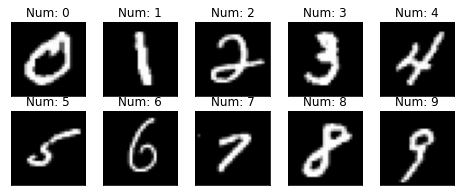

In [10]:
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    features_idx = train_features[train_labels[:]==i,:]
    ax.set_title("Num: " + str(i))
    plt.imshow(features_idx[1], cmap="gray")
plt.show()

<a id=section204></a>
### 2.4. Data Pre-processing

- First we reshape the image both train and test images.

- Then we convert the class label to binary class labels.

In [11]:
# reshape images to column vectors
train_features = train_features.reshape(train_features.shape[0], img_rows*img_cols)
test_features = test_features.reshape(test_features.shape[0], img_rows*img_cols)


# convert class labels to binary class labels
train_labels = to_categorical(train_labels, num_classes)
test_labels = to_categorical(test_labels, num_classes)

<a id=section205></a>
### 2.5. Defining the Model

In [12]:
def simple_nn():
    # initialize model
    model = Sequential()

    # add an input layer and a hidden layer
    model.add(Dense(100, input_dim = num_input_nodes))

    # add activation layer to add non-linearity
    model.add(Activation('sigmoid'))

    # to add ReLu instead of sigmoid: model.add(Activation('relu'))
    # combine above 2 layers: model.add(Dense(100, input_dim=784),Activation('sigmoid'))
    # add output layer
    model.add(Dense(num_classes))

    # add softmax layer 
    model.add(Activation('softmax'))
    return model

### Checking the model summary 

In [13]:
# define model
model = simple_nn()

# define optimizer
sgd = SGD(lr=0.01)
model.compile(optimizer=sgd, loss='mse', metrics=['accuracy'])

# print model information
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
activation (Activation)      (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1010      
_________________________________________________________________
activation_1 (Activation)    (None, 10)                0         
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


<a id=section206></a>
### 2.6. Training the Model

In [14]:
start = time.time()
model_info = model.fit(train_features, train_labels, batch_size=64, \
                       epochs=10, verbose=2, validation_split=0.2)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))

Epoch 1/10
750/750 - 3s - loss: 0.0919 - accuracy: 0.2015 - val_loss: 0.0827 - val_accuracy: 0.3360
Epoch 2/10
750/750 - 2s - loss: 0.0768 - accuracy: 0.4035 - val_loss: 0.0716 - val_accuracy: 0.4690
Epoch 3/10
750/750 - 2s - loss: 0.0677 - accuracy: 0.5235 - val_loss: 0.0638 - val_accuracy: 0.5661
Epoch 4/10
750/750 - 2s - loss: 0.0612 - accuracy: 0.5885 - val_loss: 0.0581 - val_accuracy: 0.6130
Epoch 5/10
750/750 - 2s - loss: 0.0563 - accuracy: 0.6274 - val_loss: 0.0536 - val_accuracy: 0.6462
Epoch 6/10
750/750 - 2s - loss: 0.0524 - accuracy: 0.6532 - val_loss: 0.0499 - val_accuracy: 0.6641
Epoch 7/10
750/750 - 2s - loss: 0.0489 - accuracy: 0.6717 - val_loss: 0.0468 - val_accuracy: 0.6807
Epoch 8/10
750/750 - 1s - loss: 0.0457 - accuracy: 0.6921 - val_loss: 0.0434 - val_accuracy: 0.7110
Epoch 9/10
750/750 - 2s - loss: 0.0422 - accuracy: 0.7339 - val_loss: 0.0396 - val_accuracy: 0.7599
Epoch 10/10
750/750 - 2s - loss: 0.0390 - accuracy: 0.7682 - val_loss: 0.0367 - val_accuracy: 0.7829

<a id=section207></a>
### 2.7 Plotting Accuracy and Loss

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.


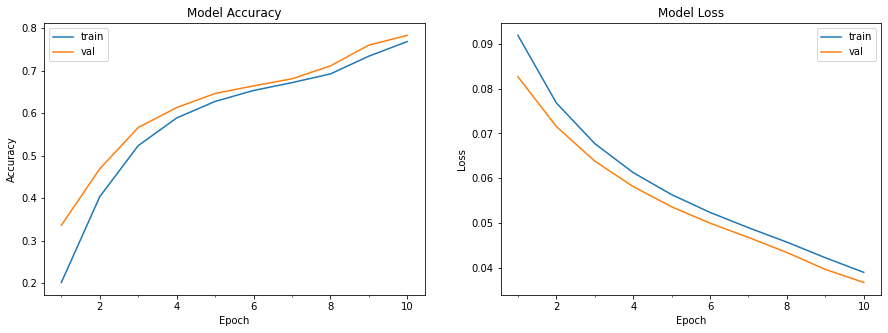

In [15]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))

    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['accuracy'])+1),model_history.history['accuracy'])
    axs[0].plot(range(1,len(model_history.history['val_accuracy'])+1),model_history.history['val_accuracy'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['accuracy'])+1),len(model_history.history['accuracy'])/10)
    axs[0].legend(['train', 'val'], loc='best')

    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()
    
plot_model_history(model_info)

**Observation:**
- We can see that the model is **not overfitting** as the train and validation accuracy is quite close.

- We can see that the training and validation accuracy both reached **80%** after the 9th epoch. 

<a id=section208></a>
### 2.8 Experimenting with the Components

- This section deals with experimentation of different components that affects the performance of the model

<a id=section20801></a>
#### 2.8.1 Original Model Testing

In [16]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

Accuracy on test data is: 78.45


**Observation:**
- Both training and validation accuracy **increase** as the number of epochs increase.

- More information is learned in each epoch.

<a id=section20802></a>
#### 2.8.2 Varying the Learning Rate

#### Decreasing the learning rate  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.


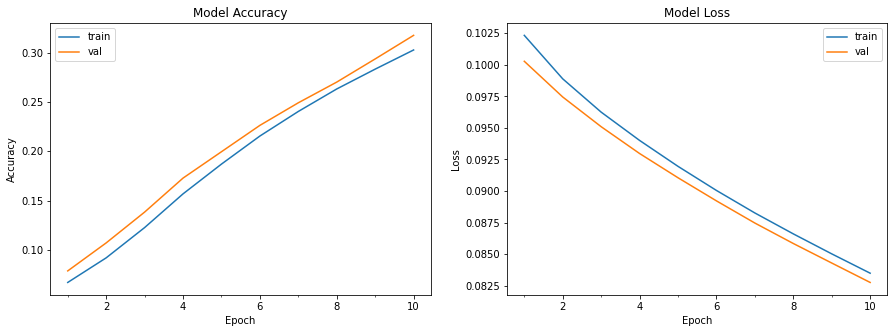

Model took 16.15 seconds to train
Accuracy on test data is: 33.35


In [17]:
# define model
model = simple_nn()
# define optimizer
sgd = SGD(lr=0.001)
model.compile(optimizer=sgd, loss='mse', metrics=['accuracy'])
# train the model
start = time.time()
model_info = model.fit(train_features, train_labels, batch_size=64, \
                       epochs=10, verbose=0, validation_split=0.2)
end = time.time()
# plot model history
plot_model_history(model_info)
print ("Model took %0.2f seconds to train"%(end - start))
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

#### Increasing the learning rate 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.


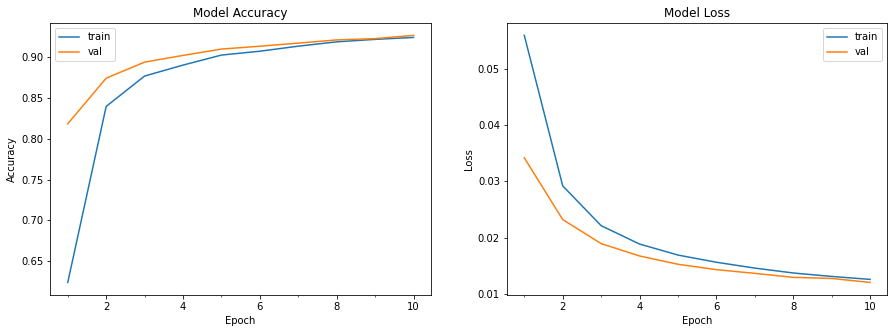

Model took 16.65 seconds to train
Accuracy on test data is: 92.64


In [18]:
# define model
model = simple_nn()
# define optimizer
sgd = SGD(lr=0.1)
model.compile(optimizer=sgd, loss='mse', metrics=['accuracy'])
# train the model
start = time.time()
model_info = model.fit(train_features, train_labels, batch_size=64, \
                       epochs=10, verbose=0, validation_split=0.2)
end = time.time()
# plot model history
plot_model_history(model_info)
print ("Model took %0.2f seconds to train"%(end - start))
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

**Observation:**

- If the learning rate is **decreased**, less information is learned in each epoch and more epochs are required to learn a good model.

- If the learning rate is **increased**, more information is learned in each epoch and less epochs are required to learn a good model.

<a id=section20803></a>
#### 2.8.3 Using Adam Optimizer instead of SGD

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.


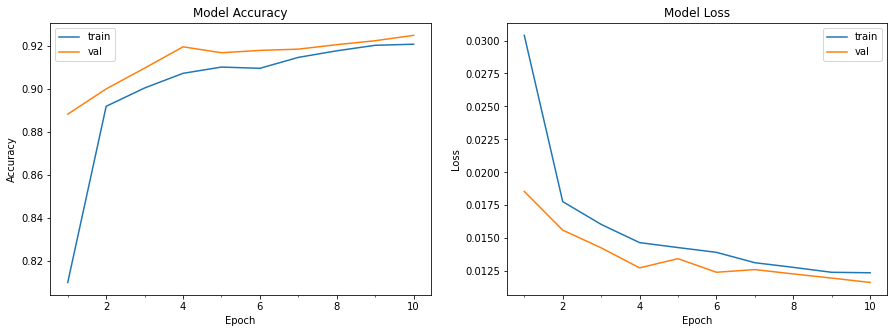

Model took 19.50 seconds to train
Accuracy on test data is: 92.11


In [19]:
# Define model
model = simple_nn()

# define optimizer, loss function
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

# Train the model
start = time.time()
model_info = model.fit(train_features, train_labels, batch_size=64, \
                       epochs=10, verbose=0, validation_split=0.2)
end = time.time()

# plot model history
plot_model_history(model_info)
print ("Model took %0.2f seconds to train"%(end - start))

# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

**Observation:**

- Using Adam optimizer, **we don’t need to specify a learning rate**. However, the training time increases.

<a id=section20804></a>
#### 2.8.4 Varying the Batch Size

#### Batch Size : 32

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.


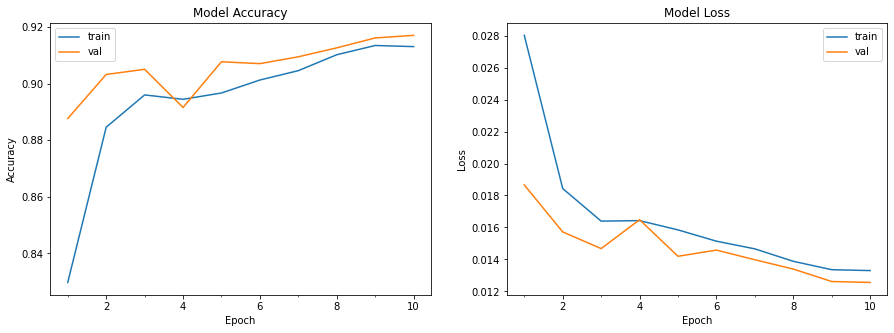

Model took 28.84 seconds to train
Accuracy on test data is: 91.78


In [20]:
# Define model
model = simple_nn()
# define optimizer, loss function
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
# Train the model
start = time.time()
model_info = model.fit(train_features, train_labels, batch_size=32, \
                       epochs=10, verbose=0, validation_split=0.2)
end = time.time()
# plot model history
plot_model_history(model_info)
print ("Model took %0.2f seconds to train"%(end - start))
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

**Observation:**

- Decreasing the batch size **increases the training time** while increasing the rate of learning.

#### Batch Size : 128

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.


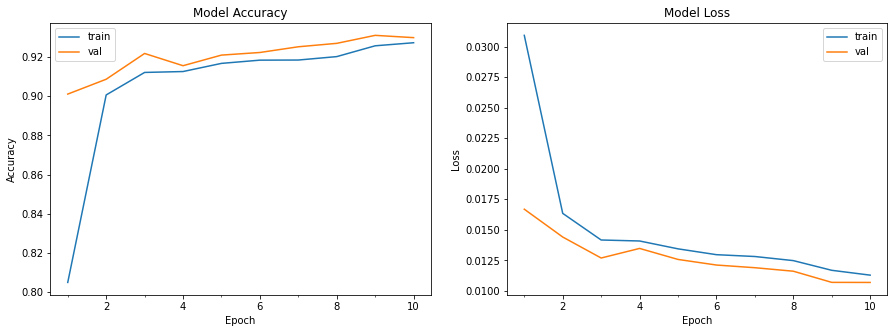

Model took 13.15 seconds to train
Accuracy on test data is: 93.14


In [21]:
# Define model
model = simple_nn()
# define optimizer, loss function
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
# Train the model
start = time.time()
model_info = model.fit(train_features, train_labels, batch_size=128, \
                       epochs=10, verbose=0, validation_split=0.2)
end = time.time()
# plot model history
plot_model_history(model_info)
print ("Model took %0.2f seconds to train"%(end - start))
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

**Observation:**

- Increasing the batch size **decreases the training time** but reduces the rate of learning.

<a id=section20805></a>
#### 2.8.5 Using Cost Function as Categorical Crossentropy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.


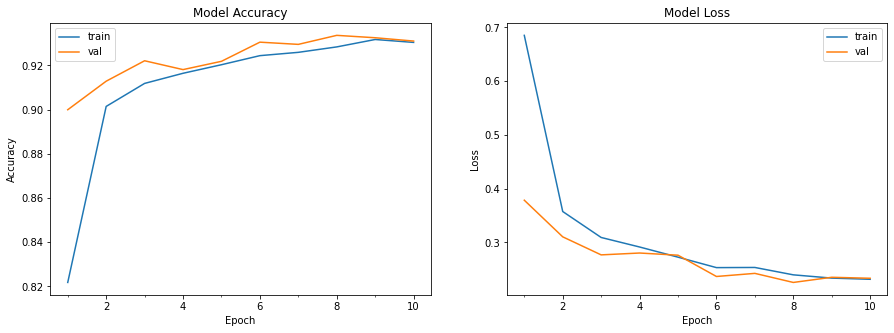

Model took 13.60 seconds to train
Accuracy on test data is: 93.13


In [22]:
# Define model
model = simple_nn()
# define optimizer, loss function
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# Train the model
start = time.time()
model_info = model.fit(train_features, train_labels, batch_size=128, \
                       epochs=10, verbose=0, validation_split=0.2)
end = time.time()
# plot model history
plot_model_history(model_info)
print ("Model took %0.2f seconds to train"%(end - start))
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

**Observation:**

- Changing the cost function to categorical crossentropy reduced the training time.

- The decrease in training time is significant when using SGD for this experiment.

<a id=section20806></a>
#### 2.8.6 Increasing the Number of Epochs

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.


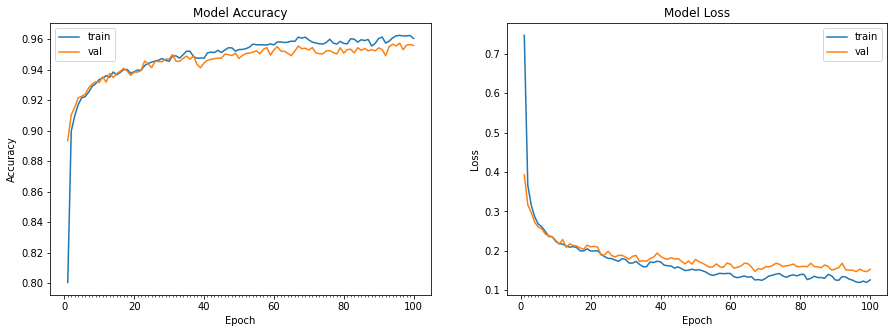

Model took 130.36 seconds to train
Accuracy on test data is: 95.32


In [23]:
# Define model
model = simple_nn()
# define optimizer, loss function
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# Train the model
start = time.time()
model_info = model.fit(train_features, train_labels, batch_size=128, \
                       epochs=100, verbose=0, validation_split=0.2)
end = time.time()
# plot model history
plot_model_history(model_info)
print ("Model took %0.2f seconds to train"%(end - start))
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

**Observation:**

- As the number of **epochs increase**, **more information is learned**. 
- The training as well as validation accuracy **increases** and then **stabilizes**.

<a id=section20807></a>
#### 2.8.7 Using Deep Neural Network

In [24]:
def deep_nn():
    # Define a deep neural network
    model = Sequential()
    model.add(Dense(512, input_dim=num_input_nodes))
    model.add(Activation('relu'))
    model.add(Dense(256))
    model.add(Activation('relu'))
    model.add(Dense(128))
    model.add(Activation('relu'))
    model.add(Dense(64))
    model.add(Activation('relu'))
    model.add(Dense(num_classes))
    model.add(Activation('softmax'))
    return model

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.


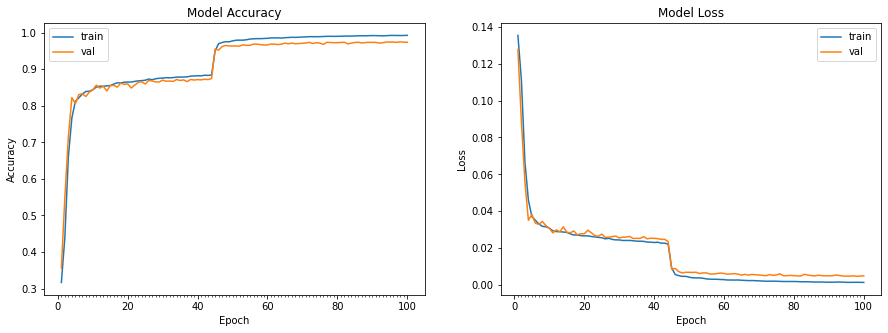

Model took 440.95 seconds to train
Accuracy on test data is: 97.38


In [25]:
model = deep_nn()
# Define optimizer
sgd = SGD(lr=0.1)
model.compile(optimizer=sgd, loss='mse', metrics=['accuracy'])
# Train the model
start = time.time()
model_info = model.fit(train_features, train_labels, batch_size=128, \
                       epochs=100, verbose=0, validation_split=0.2)
end = time.time()
# plot model history
plot_model_history(model_info)
print ("Model took %0.2f seconds to train"%(end - start))
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

**Observation:**

- By adding more hidden layers, training time as well as information learned in each epoch **increases**.

- It helps to **improve the performance** for complex tasks but may not help significantly for relatively simple datasets such as MNIST.

<a id=section20808></a>
#### 2.8.8 Saving the Model

- We need to specify the directory to save the model 

In [26]:
from tensorflow.keras.callbacks import ModelCheckpoint
import os

# define a deep neural network
model = deep_nn()

# define optimizer
sgd = SGD(lr=0.1)
model.compile(optimizer=sgd, loss='mse', metrics=['accuracy'])

# checkpoint
outputFolder = './output-mnist'
if not os.path.exists(outputFolder):
    os.makedirs(outputFolder)
filepath=outputFolder+"/weights-{epoch:02d}-{val_accuracy:.2f}.hdf5"

- We will make checkpoint for the model and save the model every 10th epoch

In [27]:
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, \
                             save_best_only=False, save_weights_only=True, \
                             mode='auto', period=10)
callbacks_list = [checkpoint]
# train the model
model_info = model.fit(train_features, train_labels, batch_size=128, \
                       epochs=80, callbacks=callbacks_list, verbose=0, \
                       validation_split=0.2)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))


Epoch 00010: saving model to ./output-mnist/weights-10-0.66.hdf5

Epoch 00020: saving model to ./output-mnist/weights-20-0.94.hdf5

Epoch 00030: saving model to ./output-mnist/weights-30-0.96.hdf5

Epoch 00040: saving model to ./output-mnist/weights-40-0.97.hdf5

Epoch 00050: saving model to ./output-mnist/weights-50-0.97.hdf5

Epoch 00060: saving model to ./output-mnist/weights-60-0.97.hdf5

Epoch 00070: saving model to ./output-mnist/weights-70-0.97.hdf5

Epoch 00080: saving model to ./output-mnist/weights-80-0.97.hdf5
Accuracy on test data is: 97.25


<a id=section20809></a>
#### 2.8.9 Resuming Training by Loading a Saved Model

- When training big models, it is often convenient to **break training** into steps (Here we load model after epoch 80)

- Train when you are not working, work when not training.

In [30]:
# define model
model = deep_nn()


# load weights
import os, glob
epoch_num = 80
outputFolder = './output-mnist'
file_ini = outputFolder+'/weights-'+ str(epoch_num)+'*'
filename =  glob.glob(file_ini)
if os.path.isfile(filename[0]):
    model.load_weights(filename[0])
else:
    print ("%s does not exist"%filename[0])


# define optimizer
sgd = SGD(lr=0.1)
model.compile(optimizer=sgd, loss='mse', metrics=['accuracy'])


# checkpoint
outputFolder = './output-mnist'
if not os.path.exists(outputFolder):
    os.makedirs(outputFolder)
filepath=outputFolder+"/weights-{epoch:02d}-{accuracy:.2f}.hdf5"

- We will resume the training, and  save it again for training it later 

In [31]:
filepath=outputFolder+"/weights-{epoch:02d}-{accuracy:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, \
                             save_best_only=False, save_weights_only=True,\
                             mode='auto', period=10)
callbacks_list = [checkpoint]


# train the model
model_info = model.fit(train_features, train_labels, batch_size=128, \
                       epochs=100, callbacks=callbacks_list, verbose=0, \
                       validation_split=0.2, initial_epoch = epoch_num+1)


# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))


Epoch 00091: saving model to ./output-mnist/weights-91-0.99.hdf5
Accuracy on test data is: 97.38


<a id=section208010></a>
#### 2.8.10 Early Stopping

- Early stopping helps as a form of regularization,** stopping training before validation loss starts increasing**.

- We define a term **patience in stopping as the no. of epochs to wait before termination**, even when loss increases, since it may **decrease** later.

Epoch 00014: early stopping


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.


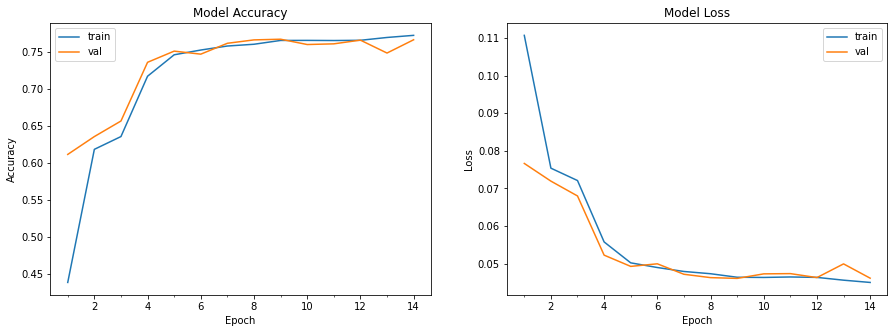

Accuracy on test data is: 76.97


In [33]:
from tensorflow.keras.callbacks import EarlyStopping
#define model
model = deep_nn()


# define optimizer
sgd = SGD(lr=0.1)
model.compile(optimizer=sgd, loss='mse', metrics=['accuracy'])


# define early stopping callback
earlystop = EarlyStopping(monitor='val_accuracy', min_delta=0.0001, patience=5, \
                          verbose=1, mode='auto')
callbacks_list = [earlystop]


# train the model
start = time.time()
model_info = model.fit(train_features, train_labels, batch_size=128, \
                       epochs=100, callbacks=callbacks_list, verbose=0, \
                       validation_split=0.2)
end = time.time()


# plot model history
plot_model_history(model_info)


# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

<a id=section209></a>
## 2.9 Conclusion

We studied about different components that effect the Deep Learning model performance .

- We tried different learning rates and batch size to imporve learning performance of the model.

- We also tried **Early stopping** which is a useful technique to prevent overfitting.

- We can improve the performance of a model by increasing the number of hidden layers and the hidden units in the model.
